# Importing Dataset 

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('netflix_analysis/Data/netflix_titles.csv', lineterminator = '\n')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), format="%B %d, %Y")


In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [ ]:
df.describe()

# Cleaning Dataset 

In [39]:
cols = ['description', 'duration', 'cast']

In [40]:
df.drop(cols, axis = 1, inplace = True)
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'listed_in'],
      dtype='object')

In [41]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
country          748
date_added      1767
release_year      74
rating            17
listed_in        514
dtype: int64

In [42]:
df.isnull()

,show_id,type,title,director,country,date_added,release_year,rating,listed_in
0,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False
3,False,False,False,True,True,False,False,False,False
4,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,False,False,False,False
8804,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False


In [43]:
df.isnull().count()

show_id         8807
type            8807
title           8807
director        8807
country         8807
date_added      8807
release_year    8807
rating          8807
listed_in       8807
dtype: int64

In [44]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
country          831
date_added        10
release_year       0
rating             4
listed_in          0
dtype: int64

In [45]:
df.shape

(8807, 9)

In [46]:
df = df.dropna()

In [47]:
df.shape

(5750, 9)

In [48]:
df.nunique()

show_id         5750
type               2
title           5750
director        4286
country          658
date_added      1517
release_year      73
rating            17
listed_in        344
dtype: int64

In [49]:
df = df.reset_index(drop = True)

In [50]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,Documentaries
1,s8,Movie,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,"Dramas, Independent Movies, International Movies"
2,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,"September 24, 2021",2021,TV-14,"British TV Shows, Reality TV"
3,s10,Movie,The Starling,Theodore Melfi,United States,"September 24, 2021",2021,PG-13,"Comedies, Dramas"
4,s13,Movie,Je Suis Karl,Christian Schwochow,"Germany, Czech Republic","September 23, 2021",2021,TV-MA,"Dramas, International Movies"


In [51]:
df['listed_in'] = df['listed_in'].str.split(', ')
df = df.explode('listed_in')
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,Documentaries
1,s8,Movie,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,Dramas
1,s8,Movie,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,Independent Movies
1,s8,Movie,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,International Movies
2,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,"September 24, 2021",2021,TV-14,British TV Shows


In [52]:
df['listed_in'] = df['listed_in'].astype('category')
df['listed_in'].dtypes

CategoricalDtype(categories=['Action & Adventure', 'Anime Features', 'Anime Series',
                  'British TV Shows', 'Children & Family Movies',
                  'Classic & Cult TV', 'Classic Movies', 'Comedies',
                  'Crime TV Shows', 'Cult Movies', 'Documentaries',
                  'Docuseries', 'Dramas', 'Faith & Spirituality',
                  'Horror Movies', 'Independent Movies',
                  'International Movies', 'International TV Shows', 'Kids' TV',
                  'Korean TV Shows', 'LGBTQ Movies', 'Movies',
                  'Music & Musicals', 'Reality TV', 'Romantic Movies',
                  'Romantic TV Shows', 'Sci-Fi & Fantasy',
                  'Science & Nature TV', 'Spanish-Language TV Shows',
                  'Sports Movies', 'Stand-Up Comedy',
                  'Stand-Up Comedy & Talk Shows', 'TV Action & Adventure',
                  'TV Comedies', 'TV Dramas', 'TV Horror', 'TV Mysteries',
                  'TV Sci-Fi & Fantasy', '

In [53]:
df['country'] = df['country'].str.split(', ')
df = df.explode('country')
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,Documentaries
1,s8,Movie,Sankofa,Haile Gerima,United States,"September 24, 2021",1993,TV-MA,Dramas
1,s8,Movie,Sankofa,Haile Gerima,Ghana,"September 24, 2021",1993,TV-MA,Dramas
1,s8,Movie,Sankofa,Haile Gerima,Burkina Faso,"September 24, 2021",1993,TV-MA,Dramas
1,s8,Movie,Sankofa,Haile Gerima,United Kingdom,"September 24, 2021",1993,TV-MA,Dramas


In [54]:
df['country'] = df['country'].astype('category')
df['country'].dtypes

CategoricalDtype(categories=['', 'Afghanistan', 'Albania', 'Algeria', 'Angola',
                  'Argentina', 'Armenia', 'Australia', 'Austria', 'Bahamas',
                  ...
                  'United Kingdom', 'United Kingdom,', 'United States',
                  'United States,', 'Uruguay', 'Vatican City', 'Venezuela',
                  'Vietnam', 'West Germany', 'Zimbabwe'],
, ordered=False, categories_dtype=object)

In [55]:
df['listed_in'].describe()

count                    16315
unique                      42
top       International Movies
freq                      3257
Name: listed_in, dtype: object

# Chart of Genere Of Movies/TV Shows Count

<Figure size 2000x2200 with 0 Axes>

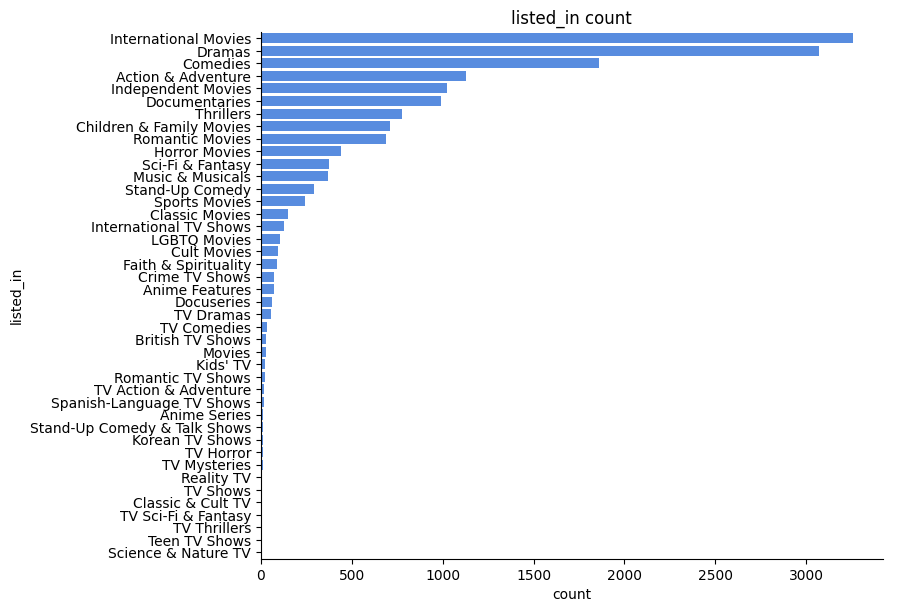

In [56]:
plt.figure(figsize=(20, 22))
sns.catplot(y = 'listed_in', data = df, kind = 'count' , order = df['listed_in'].value_counts().index, color = '#4287f5',  height=6,
    aspect=1.5)
plt.title('listed_in count')
plt.show()

# Chart of Movies/TV Shows Distribution over Year

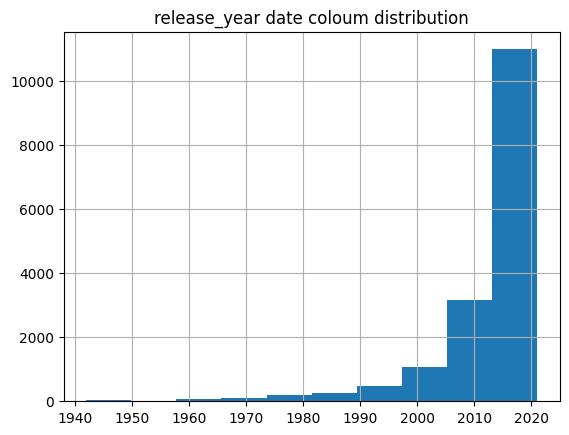

In [57]:
df['release_year'].hist()
plt.title('release_year date coloum distribution')
plt.show()

# Chart Of Content Type Distribution 

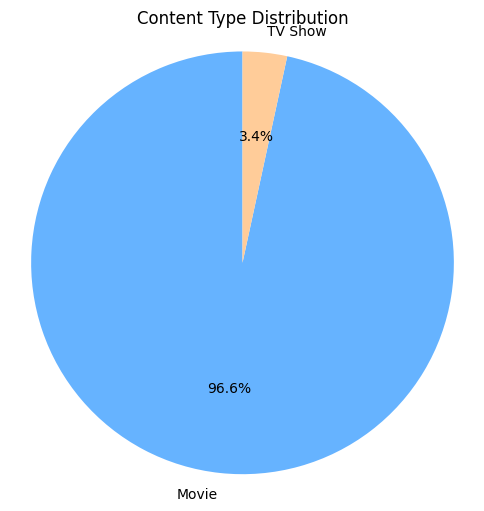

In [58]:
type_counts = df['type'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ffcc99'])
plt.title('Content Type Distribution')
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle
plt.show()

In [59]:
director_counts = df.groupby('director')['title'].count().sort_values(ascending=False)
print(director_counts.head(10))  # Top 10 directors by number of titles

director
Youssef Chahine        46
Cathy Garcia-Molina    37
Martin Scorsese        36
Lars von Trier         33
Steven Spielberg       32
Tom Hooper             30
Olivier Assayas        30
Don Michael Paul       29
Johnnie To             28
David Dhawan           27
Name: title, dtype: int64


In [60]:
director_unique_counts = df.groupby('director')['title'].nunique().sort_values(ascending=False)
print(director_unique_counts.head(10))

director
Raúl Campos, Jan Suter    18
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Jay Chapman               12
Martin Scorsese           12
Steven Spielberg          11
Don Michael Paul          10
David Dhawan               9
Name: title, dtype: int64


In [61]:
director_type_counts = df.groupby(['director', 'type'])['title'].count().unstack().fillna(0).astype(int)
print(director_type_counts.head(10))

type                            Movie  TV Show
director                                      
A. L. Vijay                         6        0
A. Raajdheep                        2        0
A. Salaam                           3        0
A.R. Murugadoss                     2        0
Aadish Keluskar                     3        0
Aamir Bashir                        2        0
Aamir Khan                          2        0
Aanand Rai                          3        0
Aaron Burns                         2        0
Aaron Hancox, Michael McNamara      2        0


# Chart Of Top 10 Director In Dataset

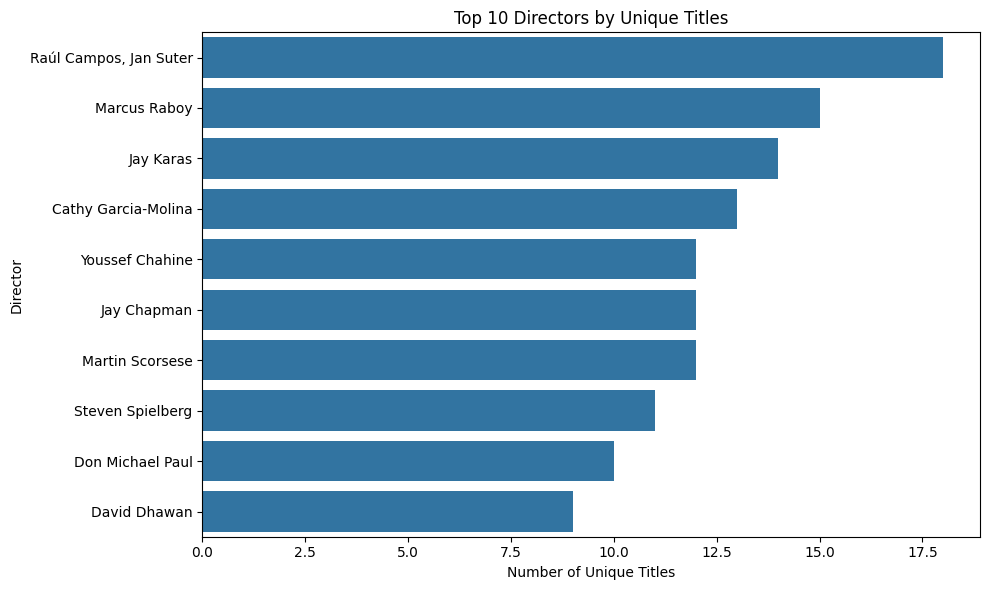

In [70]:
# Group by director and count unique titles
director_unique_counts = df.groupby('director')['title'].nunique().sort_values(ascending=False)

# Select top 10
top_directors = director_unique_counts.head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_directors.values,
    y=top_directors.index,
)
plt.title('Top 10 Directors by Unique Titles')
plt.xlabel('Number of Unique Titles')
plt.ylabel('Director')
plt.tight_layout()
plt.show() 

# Chart Of Top Countries By Unique Titles

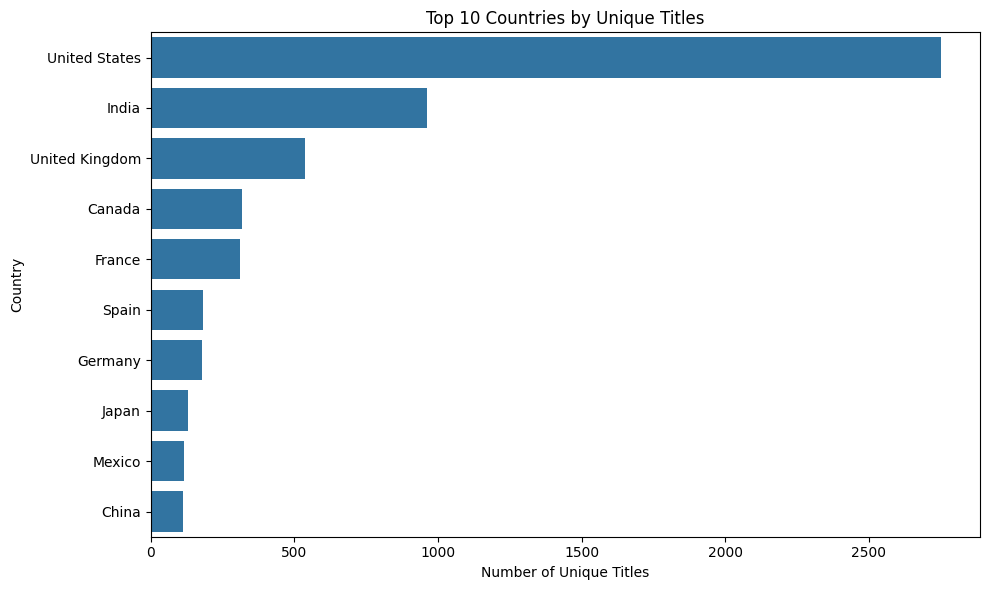

In [71]:
df['country'] = df['country'].str.strip()
df = df.dropna(subset=['country'])

# Count unique titles
country_unique_counts = df.groupby('country', observed=True)['title'].nunique().sort_values(ascending=False)

# Get top 10
top_country = country_unique_counts.head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_country.values, y=top_country.index)
plt.title('Top 10 Countries by Unique Titles')
plt.xlabel('Number of Unique Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# Chart Of Most Frequent Ratings Types Of Movies/Dataset 

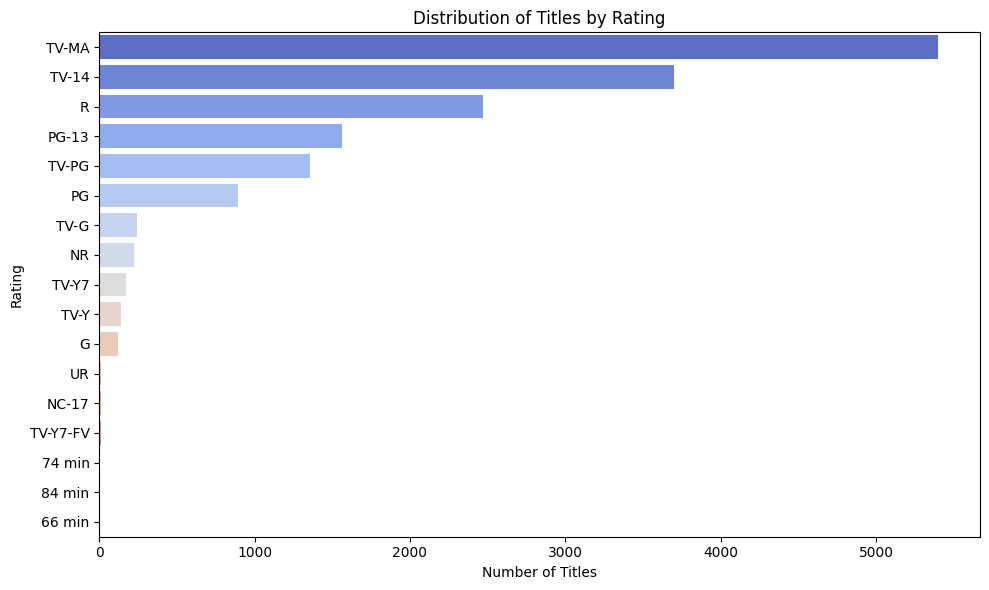

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Count of each rating
rating_counts = df['rating'].value_counts().sort_values(ascending=False).reset_index()
rating_counts.columns = ['rating', 'count']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=rating_counts,
    y='rating',
    x='count',
    hue='rating',
    palette='coolwarm',
    dodge=False,
    legend=False  # Hides the duplicate legend
)
plt.title('Distribution of Titles by Rating')
plt.xlabel('Number of Titles')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()